In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Step 1: Fetch the webpage
url = "https://www.worldometers.info/world-population/population-by-country/"
response = requests.get(url)



In [4]:
# Check if the page was fetched successfully
if response.status_code != 200:
    raise Exception(f"Failed to fetch page. Status code: {response.status_code}")

# Step 2: Parse the HTML content and locate the table
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')




In [5]:
# Step 3: Convert the HTML table into a DataFrame
df = pd.read_html(str(table))[0]

# Step 4: Rename columns for clarity
df.columns = ['Rank', 'Country', 'Population', 'Yearly Change (%)', 'Net Change',
              'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
              'Fertility Rate', 'Median Age', 'Urban Population (%)', 'World Share (%)']

# Step 5: Basic Cleaning
df['Population'] = df['Population'].replace({',': ''}, regex=True).astype(int)  # Convert Population to integer



In [6]:
# Step 6: Display basic information
print("Columns in the table:")
print(df.columns)
print("Preview of the data:")
print(df.head())



Columns in the table:
Index(['Rank', 'Country', 'Population', 'Yearly Change (%)', 'Net Change',
       'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fertility Rate', 'Median Age', 'Urban Population (%)',
       'World Share (%)'],
      dtype='object')
Preview of the data:
   Rank        Country  Population Yearly Change (%)  Net Change  \
0     1          India  1450935791            0.89 %    12866195   
1     2          China  1419321278           -0.23 %    -3263655   
2     3  United States   345426571            0.57 %     1949236   
3     4      Indonesia   283487931            0.82 %     2297864   
4     5       Pakistan   251269164            1.52 %     3764669   

   Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fertility Rate  \
0              488          2973190         -630830             2.0   
1              151          9388211         -318992             1.0   
2               38          9147420         1286132             1.6   
3             

In [7]:
# Step 7: Top 10 most populated countries
top_10 = df.nlargest(10, 'Population')
print("Top 10 most populated countries:")
print(top_10)



Top 10 most populated countries:
   Rank        Country  Population Yearly Change (%)  Net Change  \
0     1          India  1450935791            0.89 %    12866195   
1     2          China  1419321278           -0.23 %    -3263655   
2     3  United States   345426571            0.57 %     1949236   
3     4      Indonesia   283487931            0.82 %     2297864   
4     5       Pakistan   251269164            1.52 %     3764669   
5     6        Nigeria   232679478            2.10 %     4796533   
6     7         Brazil   211998573            0.41 %      857844   
7     8     Bangladesh   173562364            1.22 %     2095374   
8     9         Russia   144820423           -0.43 %     -620077   
9    10       Ethiopia   132059767            2.62 %     3368075   

   Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fertility Rate  \
0              488          2973190         -630830             2.0   
1              151          9388211         -318992             1.0   
2    

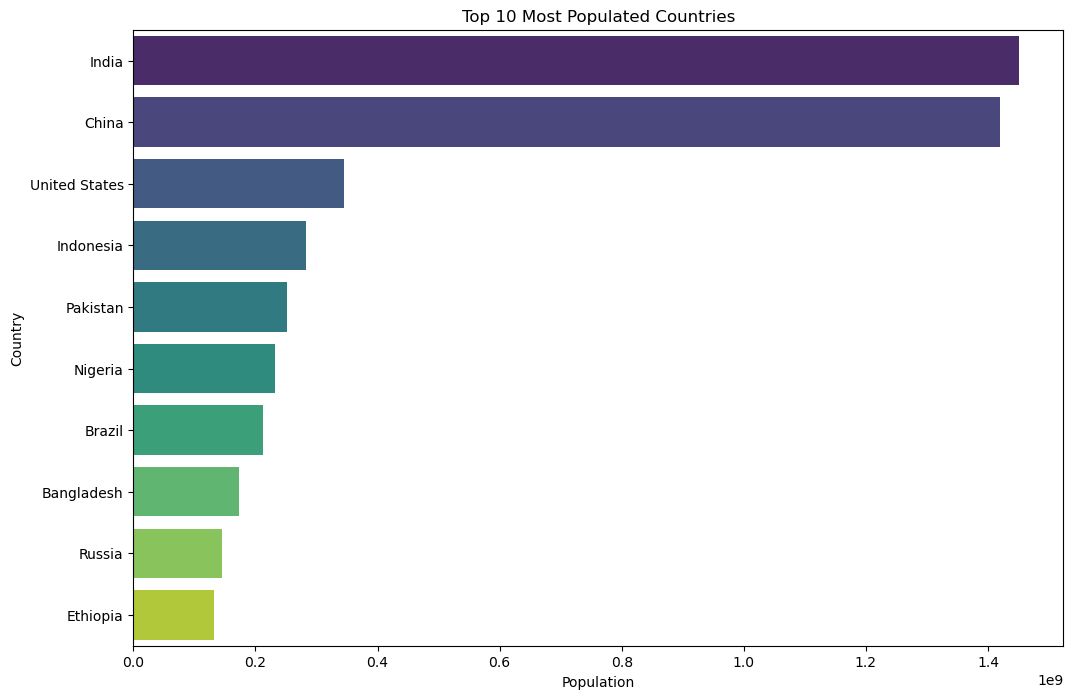

In [8]:
# Step 8: Visualization - Bar chart of the top 10 most populated countries
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10, x='Population', y='Country', palette='viridis')
plt.title('Top 10 Most Populated Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()



In [9]:
# Step 9: 10 least populated countries
least_10 = df.nsmallest(10, 'Population')
print("10 least populated countries:")
print(least_10)


10 least populated countries:
     Rank                  Country  Population Yearly Change (%)  Net Change  \
233   234                 Holy See         496            0.00 %           0   
232   233                     Niue        1819            0.11 %           2   
231   232                  Tokelau        2506            4.55 %         109   
230   231         Falkland Islands        3470           -0.20 %          -7   
229   230               Montserrat        4389           -0.70 %         -31   
228   229             Saint Helena        5237           -0.98 %         -52   
227   228  Saint Pierre & Miquelon        5628           -0.93 %         -53   
226   227                   Tuvalu        9646           -1.73 %        -170   
225   226         Saint Barthelemy       11258            1.56 %         173   
224   225          Wallis & Futuna       11277           -0.82 %         -93   

     Density (P/Km²)  Land Area (Km²)  Migrants (net)  Fertility Rate  \
233             

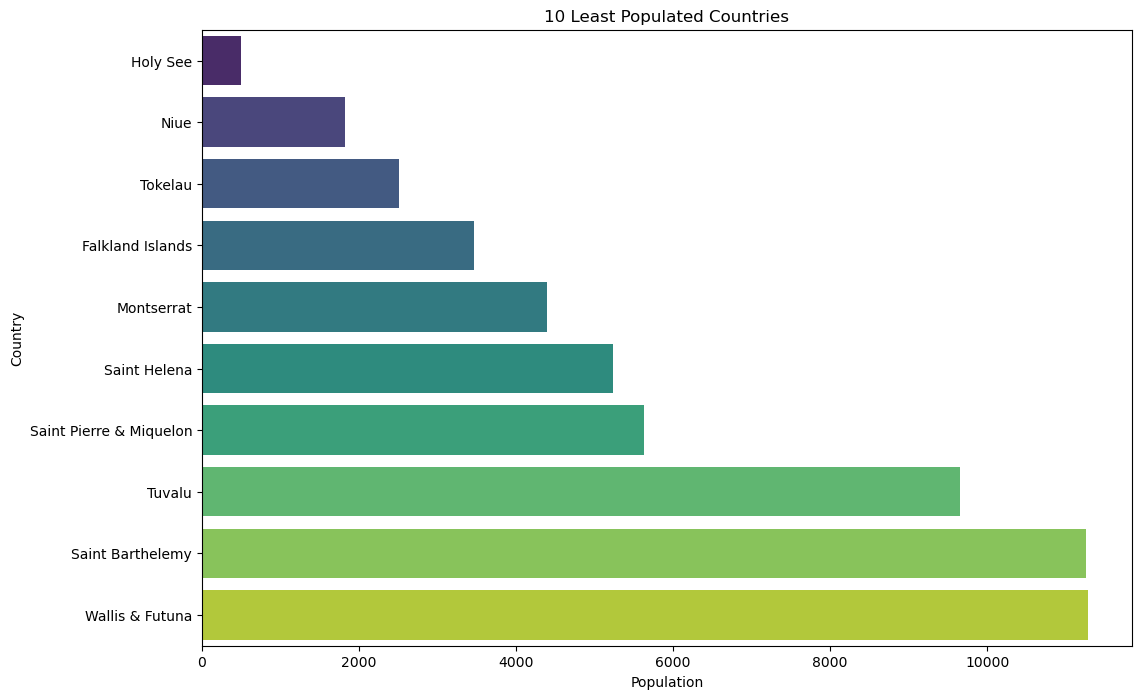

In [10]:
# Step 8: Visualization - Bar chart of the top 10 most populated countries
plt.figure(figsize=(12, 8))
sns.barplot(data=least_10, x='Population', y='Country', palette='viridis')
plt.title('10 Least Populated Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()


Summary statistics for Yearly Change (%):
count    234.000000
mean       0.942393
std        1.367075
min       -5.040000
25%        0.010000
50%        0.860000
75%        1.875000
max        5.070000
Name: Yearly Change (%), dtype: float64

Top 5 countries with the highest yearly growth:
         Country  Yearly Change (%)
64          Chad               5.07
122         Oman               4.60
56         Syria               4.57
231      Tokelau               4.55
80   South Sudan               4.01

Top 5 countries with the lowest yearly growth:
                      Country  Yearly Change (%)
219              Saint Martin              -5.04
222              Cook Islands              -3.47
216          Marshall Islands              -3.29
210  Northern Mariana Islands              -1.92
94                     Greece              -1.90


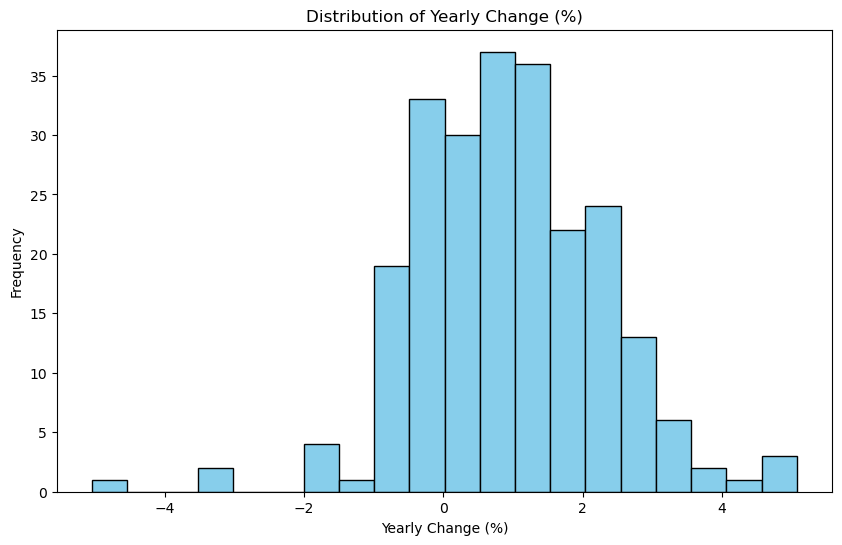

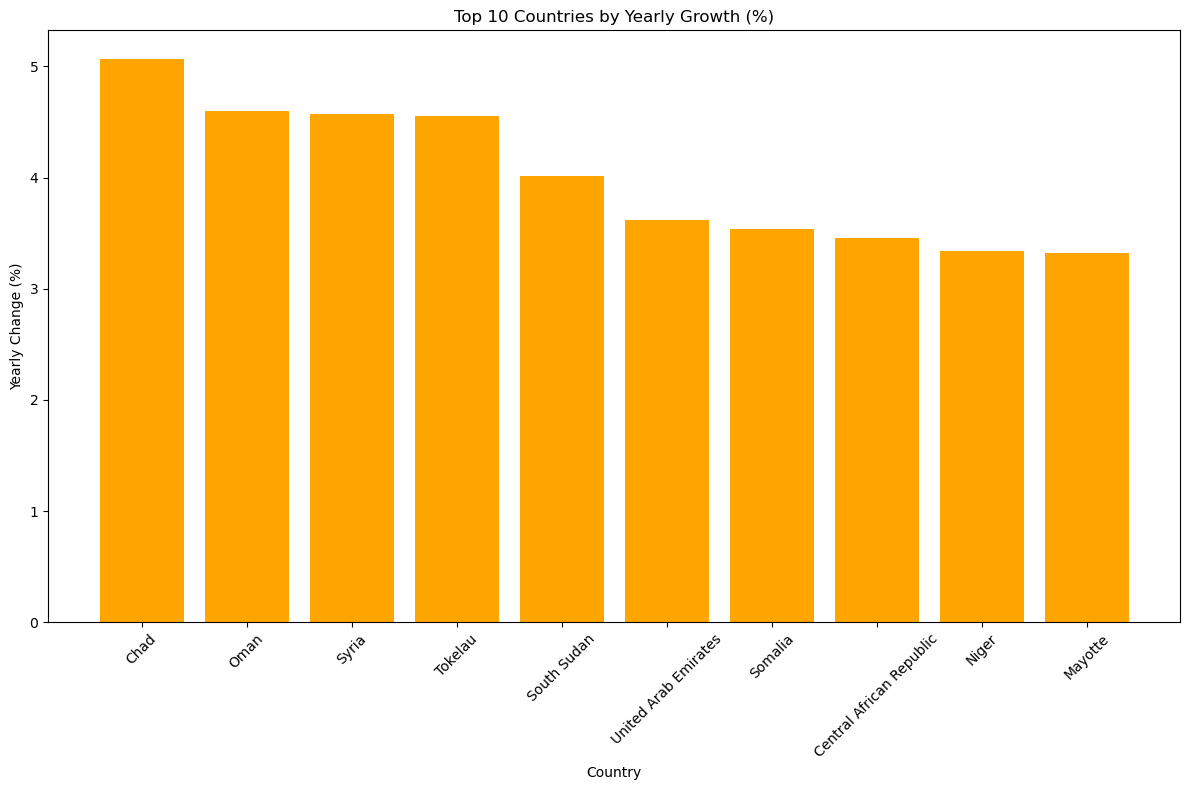

In [14]:
#Step 9: Plotting a Yearly Growth by Population Chart


# 1. Basic statistics
print("Summary statistics for Yearly Change (%):")
print(df['Yearly Change (%)'].describe())

# 2. Countries with the highest and lowest growth
highest_growth = df.nlargest(5, 'Yearly Change (%)')
lowest_growth = df.nsmallest(5, 'Yearly Change (%)')

print("\nTop 5 countries with the highest yearly growth:")
print(highest_growth[['Country', 'Yearly Change (%)']])

print("\nTop 5 countries with the lowest yearly growth:")
print(lowest_growth[['Country', 'Yearly Change (%)']])

# 3. Visualizing the yearly growth distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Yearly Change (%)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Change (%)')
plt.xlabel('Yearly Change (%)')
plt.ylabel('Frequency')
plt.show()

# 4. Yearly Change (%) by Country
plt.figure(figsize=(12, 8))
df_sorted = df.sort_values(by='Yearly Change (%)', ascending=False)
plt.bar(df_sorted['Country'][:10], df_sorted['Yearly Change (%)'][:10], color='orange')
plt.title('Top 10 Countries by Yearly Growth (%)')
plt.xlabel('Country')
plt.ylabel('Yearly Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Summary statistics for Migrants (net):
count    2.340000e+02
mean     7.461111e+01
std      1.792969e+05
min     -1.401173e+06
25%     -1.176800e+04
50%     -5.045000e+02
75%      3.452500e+03
max      1.286132e+06
Name: Migrants (net), dtype: float64

Top 5 countries with the highest migration rates:
           Country  Migrants (net)
2    United States         1286132
41         Ukraine         1146012
56           Syria          546494
20  United Kingdom          417114
37          Canada          368599

Top 5 countries with the lowest (negative) migration rates:
       Country  Migrants (net)
4     Pakistan        -1401173
0        India         -630830
29       Sudan         -544257
7   Bangladesh         -473362
50       Nepal         -401282


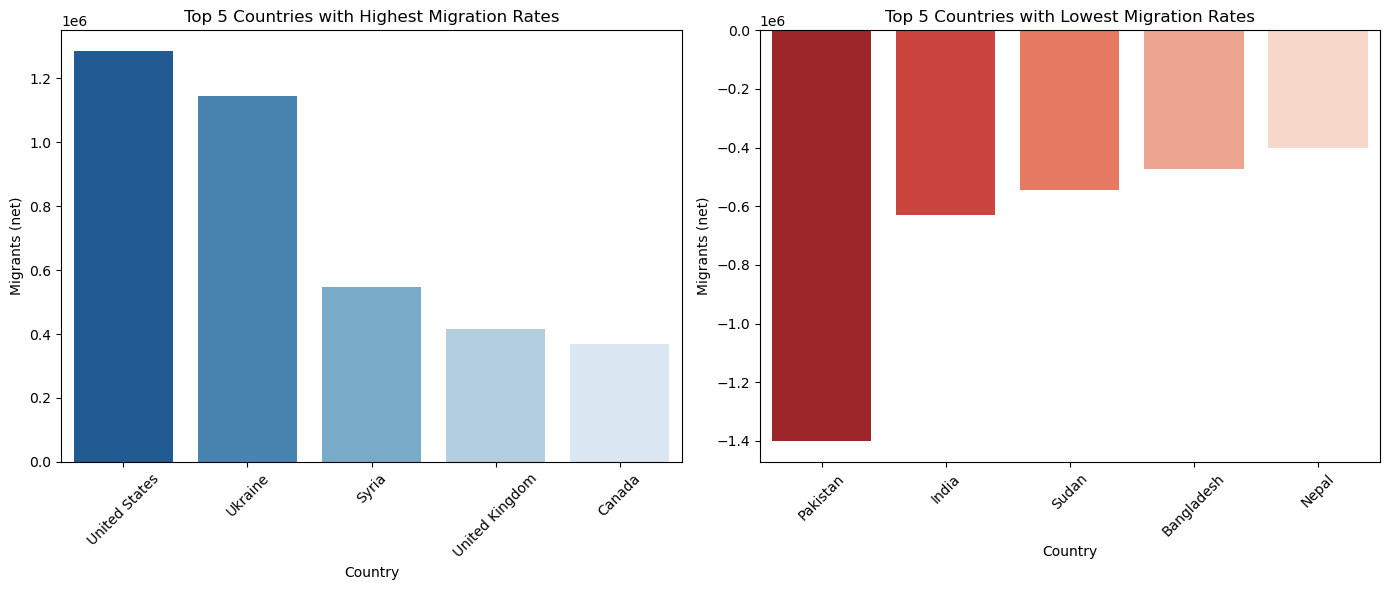

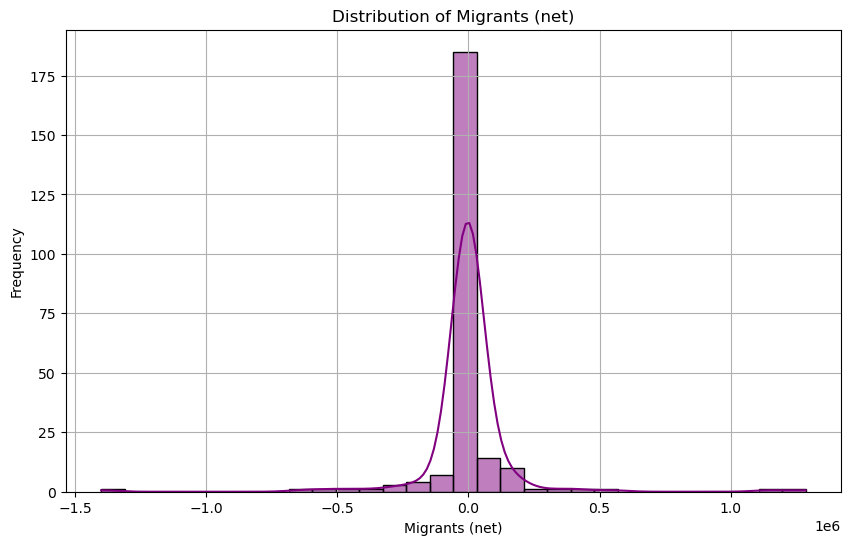

In [16]:
# Step 10: Examining for countries with the highest and lowest migration rates

# 1. Basic Statistics for Migrants
print("Summary statistics for Migrants (net):")
print(df['Migrants (net)'].describe())

# 2. Top 5 countries with the highest and lowest migration rates
highest_migration = df.nlargest(5, 'Migrants (net)')
lowest_migration = df.nsmallest(5, 'Migrants (net)')

print("\nTop 5 countries with the highest migration rates:")
print(highest_migration[['Country', 'Migrants (net)']])

print("\nTop 5 countries with the lowest (negative) migration rates:")
print(lowest_migration[['Country', 'Migrants (net)']])

# 3. Visualize the Top and Bottom Migration Rates
plt.figure(figsize=(14, 6))

# Highest Migration
plt.subplot(1, 2, 1)
sns.barplot(data=highest_migration, x='Country', y='Migrants (net)', palette='Blues_r')
plt.title('Top 5 Countries with Highest Migration Rates')
plt.xlabel('Country')
plt.ylabel('Migrants (net)')
plt.xticks(rotation=45)

# Lowest Migration
plt.subplot(1, 2, 2)
sns.barplot(data=lowest_migration, x='Country', y='Migrants (net)', palette='Reds_r')
plt.title('Top 5 Countries with Lowest Migration Rates')
plt.xlabel('Country')
plt.ylabel('Migrants (net)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Overall Distribution of Migration Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Migrants (net)'], bins=30, kde=True, color='purple')
plt.title('Distribution of Migrants (net)')
plt.xlabel('Migrants (net)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Summary statistics for Fertility Rate:
count    234.000000
mean       2.332051
std        1.163002
min        0.700000
25%        1.500000
50%        2.000000
75%        2.975000
max        6.000000
Name: Fertility Rate, dtype: float64

Top 5 countries with the highest fertility rates:
                      Country  Fertility Rate
14                   DR Congo             6.0
64                       Chad             6.0
67                    Somalia             6.0
121  Central African Republic             6.0
53                      Niger             5.9

Top 5 countries with the lowest fertility rates:
              Country  Fertility Rate
28        South Korea             0.7
104         Hong Kong             0.7
166             Macao             0.7
225  Saint Barthelemy             0.8
59             Taiwan             0.9


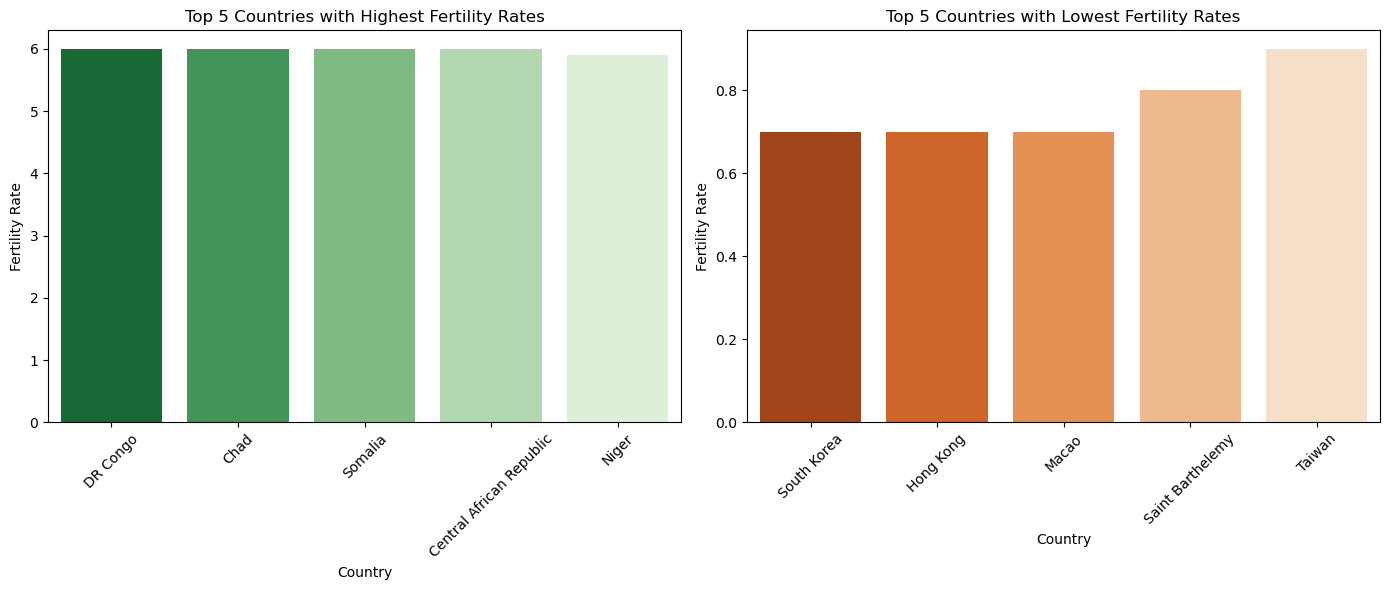

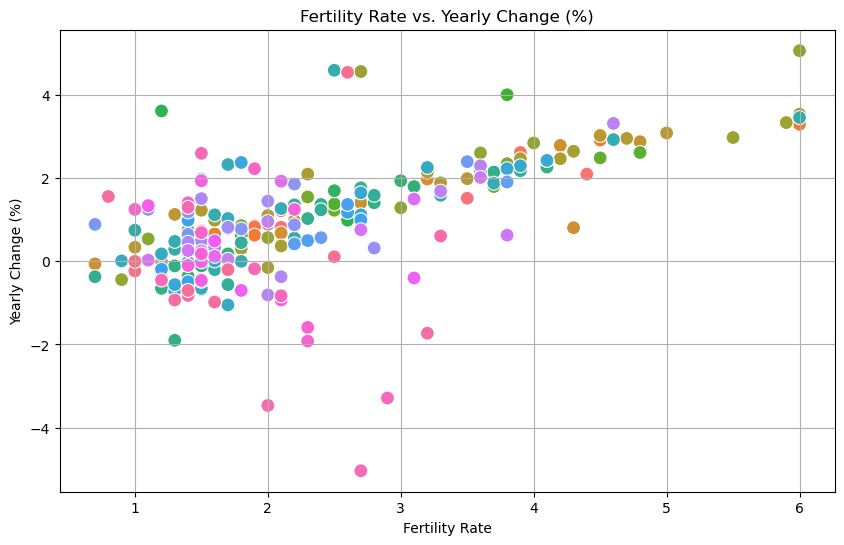

Correlation between Fertility Rate and Yearly Change (%): 0.63


In [18]:
# Step 11: Finding Countries With The Highest and Lowest Fertility Rates And Correlation Between Facility Rates and Population 

# Data Cleaning
df['Fertility Rate'] = pd.to_numeric(df['Fertility Rate'], errors='coerce')  

# Dropping rows with missing Fertility Rate or Yearly Change (%)
df = df.dropna(subset=['Fertility Rate', 'Yearly Change (%)'])

# 1. Basic Statistics for Fertility Rate
print("Summary statistics for Fertility Rate:")
print(df['Fertility Rate'].describe())

# 2. Top 5 countries with highest and lowest fertility rates
highest_fertility = df.nlargest(5, 'Fertility Rate')
lowest_fertility = df.nsmallest(5, 'Fertility Rate')

print("\nTop 5 countries with the highest fertility rates:")
print(highest_fertility[['Country', 'Fertility Rate']])

print("\nTop 5 countries with the lowest fertility rates:")
print(lowest_fertility[['Country', 'Fertility Rate']])

# 3. Visualize the Top and Bottom Fertility Rates
plt.figure(figsize=(14, 6))

# Highest Fertility
plt.subplot(1, 2, 1)
sns.barplot(data=highest_fertility, x='Country', y='Fertility Rate', palette='Greens_r')
plt.title('Top 5 Countries with Highest Fertility Rates')
plt.xlabel('Country')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=45)

# Lowest Fertility
plt.subplot(1, 2, 2)
sns.barplot(data=lowest_fertility, x='Country', y='Fertility Rate', palette='Oranges_r')
plt.title('Top 5 Countries with Lowest Fertility Rates')
plt.xlabel('Country')
plt.ylabel('Fertility Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. Scatter plot: Fertility Rate vs. Yearly Change (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fertility Rate', y='Yearly Change (%)', hue='Country', legend=False, s=100)
plt.title('Fertility Rate vs. Yearly Change (%)')
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly Change (%)')
plt.grid(True)
plt.show()

# 5. Correlation between Fertility Rate and Yearly Change (%)
correlation = df['Fertility Rate'].corr(df['Yearly Change (%)'])
print(f"Correlation between Fertility Rate and Yearly Change (%): {correlation:.2f}")




# INSIGHTS
1. India is the most populated country in the world as at 2024 with a population of 1.4 billion people.
2. Holy See is the least populated country with a population of 496 people.
3. Chad is the country with the highest yearly growth with a 5.07% yearly change in population.
4. Saint Martin is the country with the lowest yearly growth with a -5.04% yearly change.
5. People migrate to the United States the most as it has the highest net migration rate.
6. Pakistan is the country people least migrate to. It has the lowest net migration rate.
7. Fertility rates in African countries have improved greatly: Congo, Chad, Somalia, Central African Republic and Niger have had the highest fertility rates in 2024.
8. Asian countries have the lowest fertility rates; they probably don't fancy children or are possibly trying to control their population: South Korea, Hong Kong, Macao, and Taiwan have the lowest fertility rates.
9. Saint Barthelemy also has a low fertility rate, possibly because its a small island
10. There is a moderately strong correlation between fertility rate and yearly change in population
